In [10]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split

import warnings
warnings.filterwarnings('ignore') 

In [11]:
#Loading Dataset
zoo=pd.read_csv('/content/Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [13]:
zoo.shape

(101, 18)

In [14]:
zoo.duplicated().sum()

0

In [15]:
correlation=zoo.corr()
zoo.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


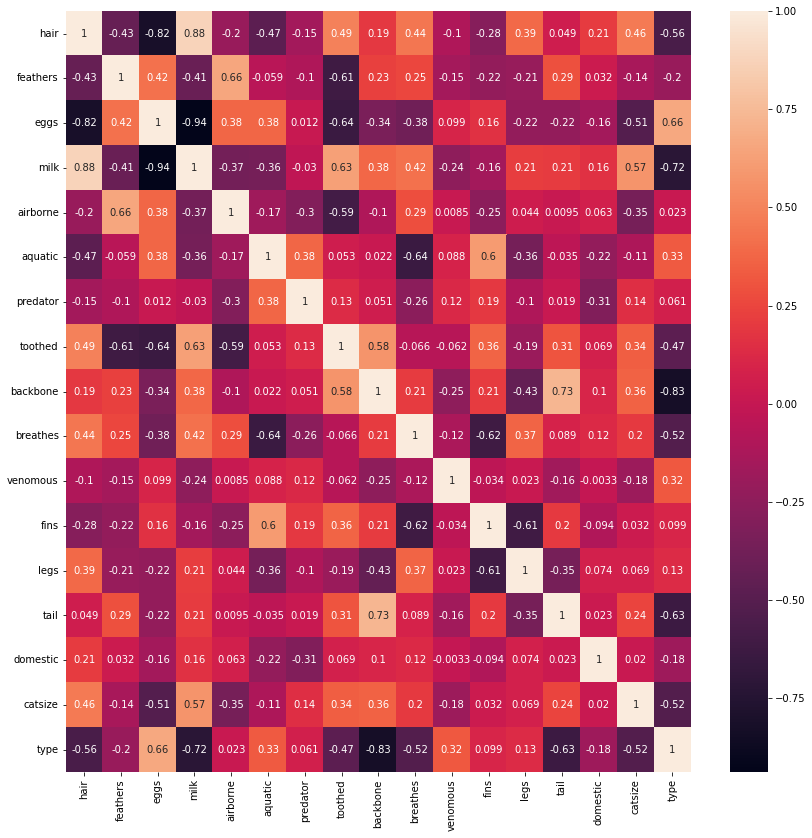

In [16]:
plt.figure(figsize=(14,14))
sns.heatmap(correlation,annot=True)

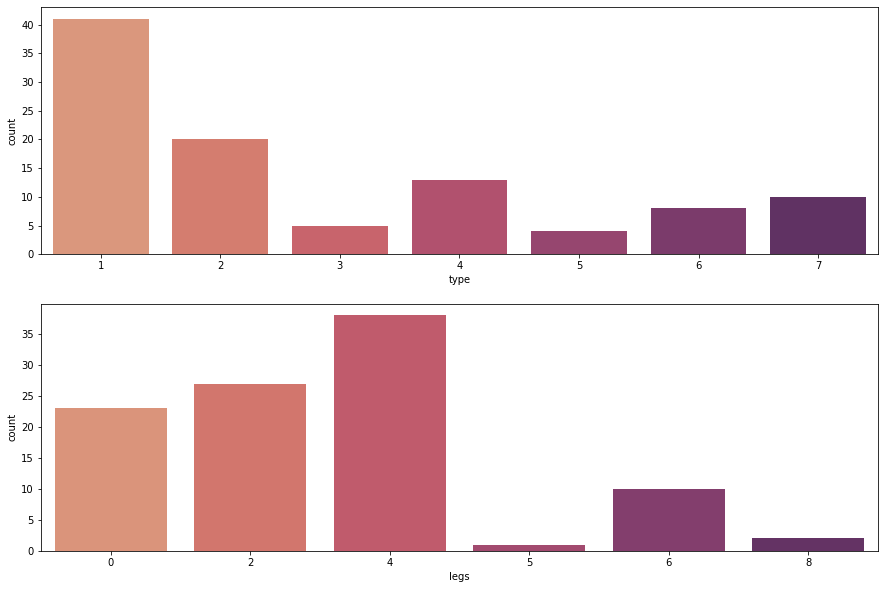

In [17]:
fig, ax =plt.subplots(2,1, figsize=(15,10)) 

sns.countplot(zoo['type'], palette='flare' , ax=ax[0])
sns.countplot(zoo['legs'], palette='flare', ax=ax[1])

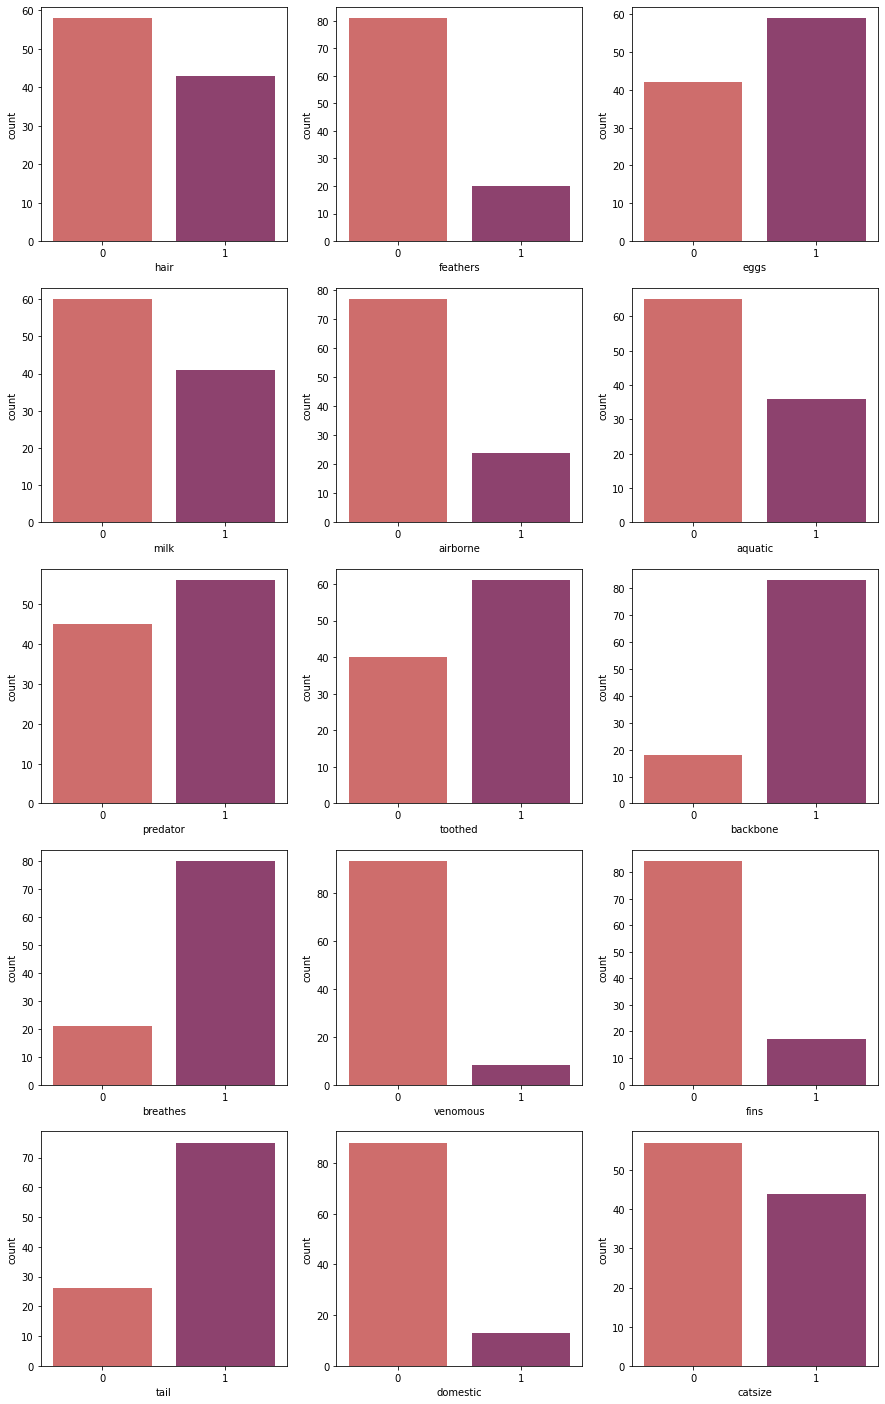

In [18]:
fig, ax =plt.subplots(5,3, figsize=(15,25)) 


sns.countplot(zoo['hair'], palette='flare', ax=ax[0,0])
sns.countplot(zoo['feathers'], palette='flare', ax=ax[0,1])
sns.countplot(zoo['eggs'], palette='flare', ax=ax[0,2])

sns.countplot(zoo['milk'], palette='flare', ax=ax[1,0])
sns.countplot(zoo['airborne'], palette='flare', ax=ax[1,1])
sns.countplot(zoo['aquatic'], palette='flare', ax=ax[1,2])

sns.countplot(zoo['predator'], palette='flare', ax=ax[2,0])
sns.countplot(zoo['toothed'], palette='flare', ax=ax[2,1])
sns.countplot(zoo['backbone'], palette='flare', ax=ax[2,2])

sns.countplot(zoo['breathes'], palette='flare', ax=ax[3,0])
sns.countplot(zoo['venomous'], palette='flare', ax=ax[3,1])
sns.countplot(zoo['fins'], palette='flare', ax=ax[3,2])

sns.countplot(zoo['tail'], palette='flare', ax=ax[4,0])
sns.countplot(zoo['domestic'], palette='flare', ax=ax[4,1])
sns.countplot(zoo['catsize'], palette='flare', ax=ax[4,2]);

## Data Pre-Processing

Test Train Split and K Fold Validation

In [19]:
x=zoo.drop(['type','animal name'],axis=1)
y=zoo[['type']]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [21]:
print('Shape of X_train: ' ,x_train.shape)
print('Shape of X_test: ' , x_test.shape)
print('Shape of y_train: ' ,y_train.shape)
print('Shape of y_test' ,y_test.shape)

Shape of X_train:  (70, 16)
Shape of X_test:  (31, 16)
Shape of y_train:  (70, 1)
Shape of y_test (31, 1)


## How to choose the optimum value for K(neighbours)?

Initially lets take random K value
K=5

In [22]:
num_folds = 10
kfold = KFold(n_splits=10)

In [23]:
model = KNeighborsClassifier(n_neighbors=5) # K = 5
results = cross_val_score(model, x, y, cv=kfold) 
# we are using x and y instead of x_train, y_train because we are using k-fold cross validation

In [24]:
print('Accuracy with k = 5 and k fold validation', np.round(results.mean(),3))

Accuracy with k = 5 and k fold validation 0.88


In [25]:
# if you want to use train test split then
model = KNeighborsClassifier(n_neighbors=5) # K = 5
model.fit(x_train,y_train)
pred_y = model.predict(x_test)
accuracy_score(y_test, pred_y)
print('Accuracy with k = 5 and train test split', accuracy_score(y_test, pred_y))

Accuracy with k = 5 and train test split 0.9032258064516129


##Now lets do Grid search for choosing the best Value of K

In [26]:
n_neigh = np.array(range(1,40,2)) #odd number of k
param_grid = dict(n_neighbors=n_neigh)

In [27]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid.fit(x, y) 

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [28]:
print(grid.best_score_)
print(grid.best_params_) 

0.9800000000000001
{'n_neighbors': 1}


In [30]:
n_neigh = np.array(range(3,40,2)) #odd number of k excluding 1
param_grid = dict(n_neighbors=n_neigh) 

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid.fit(x, y)  

print(grid.best_score_)
print(grid.best_params_) 

0.9400000000000001
{'n_neighbors': 3}


##But why we are choosing odd values for k?

When the value of K is set to even, a situation may arise in which the elements from both groups surrounding new datapoint are equal.

In this condition, the model would be unable to do the correct classification. Here the model will randomly assign any of the two classes to this new unknown data.

Choosing an odd value for K is preferred because such a state of equality between the two classes would never occur here. Due to the fact that one of the two groups would still be in the majority, the value of K is selected as odd.

##Visualizing performance against no. of neighbours(K)

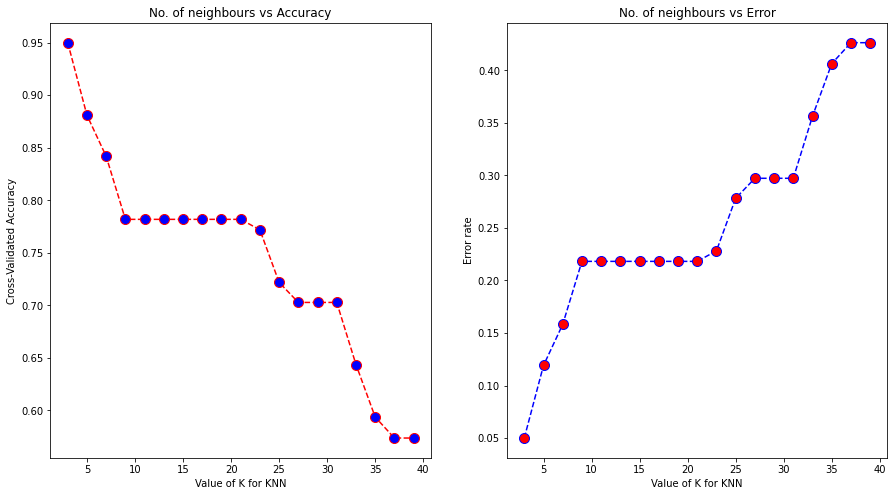

In [31]:
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 3 to 39
k_range =np.array(range(3,40,2))
k_scores = []
error_rate = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
    
    error_rate.append((1-scores.mean()))
      

        
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('No. of neighbours vs Accuracy')

plt.subplot(1,2,2)
plt.plot(k_range , error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10) 
plt.xlabel('Value of K for KNN')
plt.ylabel('Error rate')
plt.title('No. of neighbours vs Error')

plt.show() 

##Lets apply K-NN for K = 3 (for maximum accuracy)

In [32]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
pred_y = model.predict(x_test)
accuracy_score(y_test, pred_y)

0.9354838709677419

In [33]:
print(classification_report(y_test, pred_y)) 

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         5
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.94      0.93      0.93        31
weighted avg       0.95      0.94      0.93        31



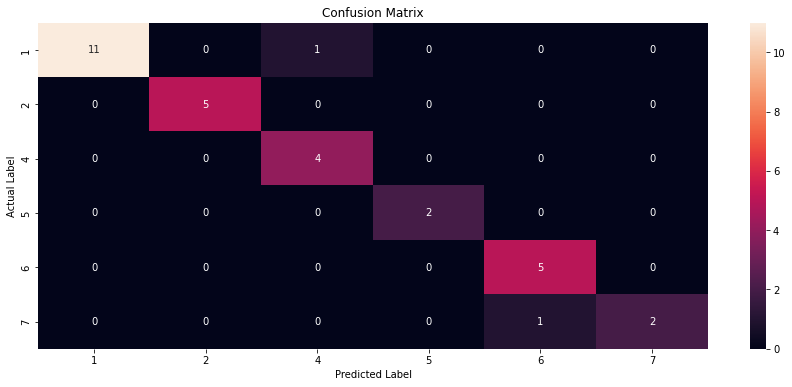

In [34]:
cm_df = confusion_matrix(y_test, pred_y)
class_label = ['1','2','4','5','6','7'] #class 3 is absent in test set

df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
plt.figure(figsize=(15,6))
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()